#### PROBLEM STATEMENT:
 - Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are not rejected. When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
    - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
    - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
 - Analyse the credit data using EDA to understand how consumer attributes and loan attributes influence the tendency of default.

In [73]:
#Import all the necessary libraries.

import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [74]:
df = pd.read_csv("application_data.csv")

In [75]:
df.shape

(307511, 122)

In [76]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [77]:
#Set SK_ID_CURR as Index for this dataset.
df.set_index(['SK_ID_CURR'],inplace=True)

### Finding Missing Values

In [78]:
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
BASEMENTAREA_MEDI               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

#### Deleteing the columns which has more than or to close to 50% of missing values.

In [79]:
df = df.loc[:, df.isnull().mean() < .45]

In [80]:
round(100*(df.isnull().sum()/len(df.index)),4).sort_values(ascending=False)

OCCUPATION_TYPE                31.3455
EXT_SOURCE_3                   19.8253
AMT_REQ_CREDIT_BUREAU_HOUR     13.5016
AMT_REQ_CREDIT_BUREAU_QRT      13.5016
AMT_REQ_CREDIT_BUREAU_YEAR     13.5016
AMT_REQ_CREDIT_BUREAU_DAY      13.5016
AMT_REQ_CREDIT_BUREAU_WEEK     13.5016
AMT_REQ_CREDIT_BUREAU_MON      13.5016
NAME_TYPE_SUITE                 0.4201
OBS_60_CNT_SOCIAL_CIRCLE        0.3320
DEF_30_CNT_SOCIAL_CIRCLE        0.3320
OBS_30_CNT_SOCIAL_CIRCLE        0.3320
DEF_60_CNT_SOCIAL_CIRCLE        0.3320
EXT_SOURCE_2                    0.2146
AMT_GOODS_PRICE                 0.0904
AMT_ANNUITY                     0.0039
CNT_FAM_MEMBERS                 0.0007
DAYS_LAST_PHONE_CHANGE          0.0003
FLAG_EMP_PHONE                  0.0000
FLAG_MOBIL                      0.0000
FLAG_CONT_MOBILE                0.0000
FLAG_PHONE                      0.0000
FLAG_EMAIL                      0.0000
FLAG_WORK_PHONE                 0.0000
DAYS_BIRTH                      0.0000
DAYS_ID_PUBLISH          

#### Getting all the column names which are having less than 50% of missing values in a list.

In [81]:
cols = list(df.columns[df.isnull().any()])
cols

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

#### Seperating Categorical and Numerical features from the missing feature lists.

In [82]:
col_num = []
col_cat = []
for col in cols:     
    if (df[col].dtype) == 'O':
        col_cat.append(col)
    else:
        col_num.append(col)

#### Plotting Count Plot for categorical features having missing values

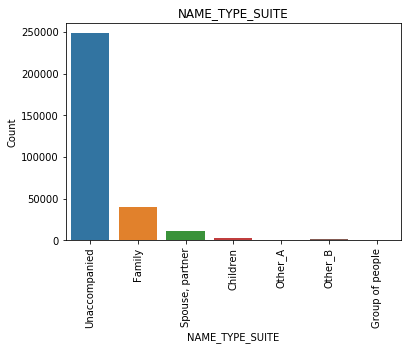

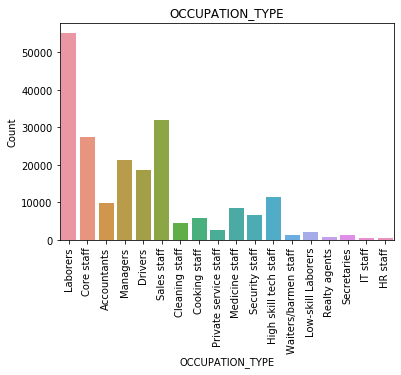

In [83]:
for i in col_cat:
    sns.countplot(x= i, data = df)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

#### Plotting histograms for numerical features having numerical features.

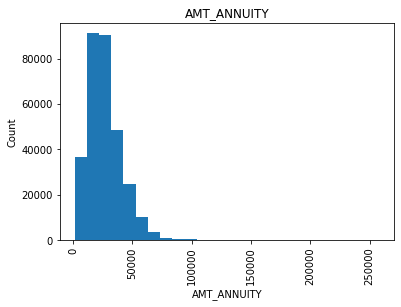

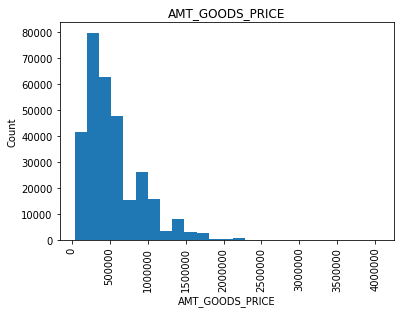

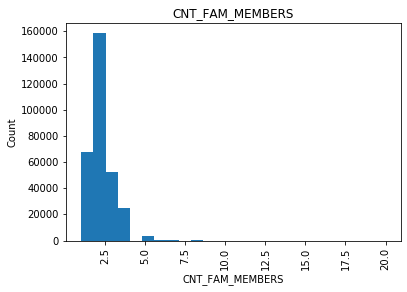

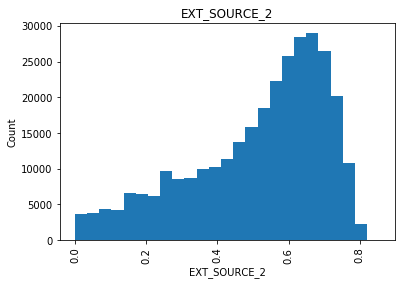

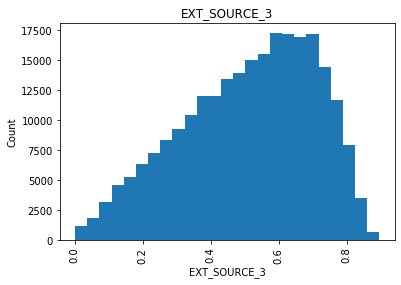

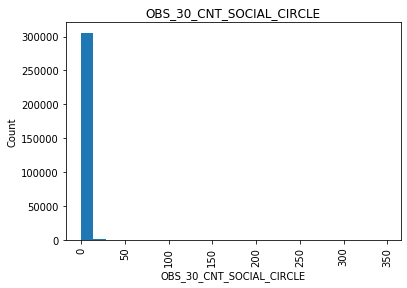

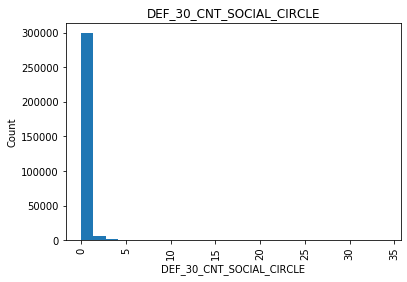

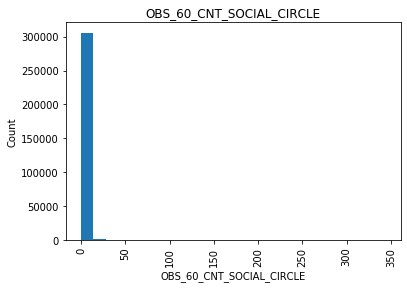

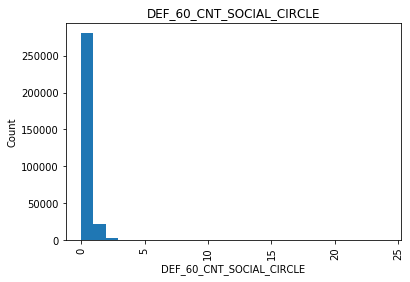

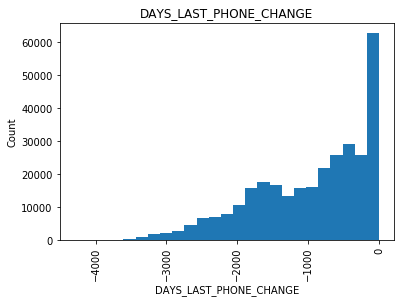

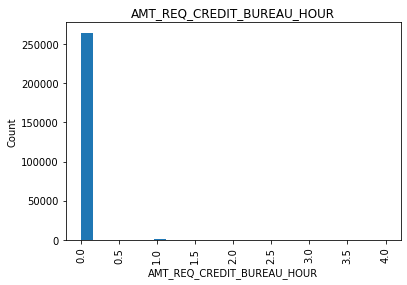

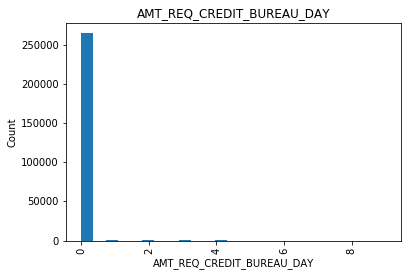

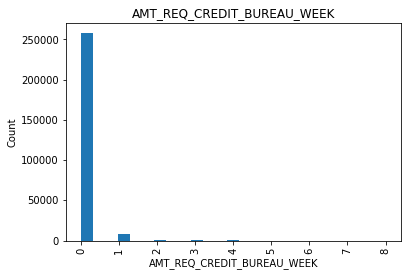

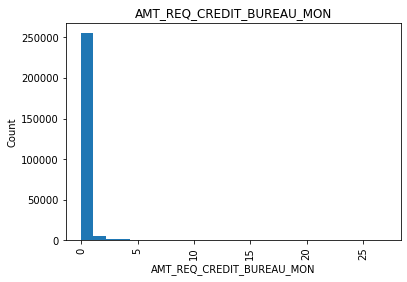

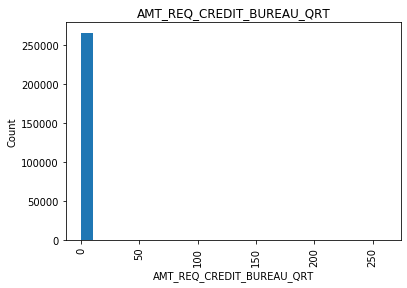

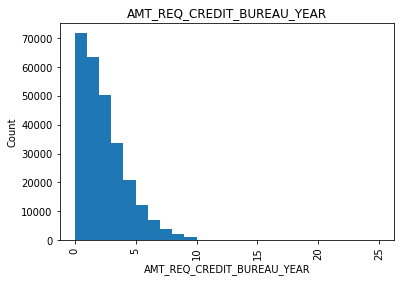

In [84]:
for i in col_num:
    df[i].plot.hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

In [85]:
df[col_num].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307499.000000,3.072330e+05,307509.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,27108.573909,5.383962e+05,2.152665,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,14493.737315,3.694465e+05,0.910682,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,1615.500000,4.050000e+04,1.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16524.000000,2.385000e+05,2.000000,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24903.000000,4.500000e+05,2.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,34596.000000,6.795000e+05,3.000000,6.636171e-01,0.669057,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,258025.500000,4.050000e+06,20.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [86]:
print(df["AMT_GOODS_PRICE"].describe().apply(lambda x: format(x, 'f'))) 
print('----------------------')
print(df["EXT_SOURCE_2"].describe().apply(lambda x: format(x, 'f'))) 

count     307233.000000
mean      538396.207429
std       369446.460540
min        40500.000000
25%       238500.000000
50%       450000.000000
75%       679500.000000
max      4050000.000000
Name: AMT_GOODS_PRICE, dtype: object
----------------------
count    306851.000000
mean          0.514393
std           0.191060
min           0.000000
25%           0.392457
50%           0.565961
75%           0.663617
max           0.855000
Name: EXT_SOURCE_2, dtype: object


#### Based on the plots we know that we cannot impute missing values for numerical features with mean since all of thema re skewed data and doensnot follow standard normal distrinution.
#### For all numerical features get Unique values counts/Mean/Median and Mode so that we can impute missing values.

In [87]:
for i in col_num:
    print(df[i].value_counts().head(10))
    print('mean:',df[i].mean())
    print('mode:',df[i].mode())
    print('median:',df[i].median())

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
11250.0    1459
26217.0    1453
20250.0    1345
12375.0    1339
31653.0    1269
Name: AMT_ANNUITY, dtype: int64
mean: 27108.573909183444
mode: 0    9000.0
dtype: float64
median: 24903.0
450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
Name: AMT_GOODS_PRICE, dtype: int64
mean: 538396.2074288895
mode: 0    450000.0
dtype: float64
median: 450000.0
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
Name: CNT_FAM_MEMBERS, dtype: int64
mean: 2.152665450442101
mode: 0    2.0
dtype: float64
median: 2.0
0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
0.266520    244
0.263144    243
0.162145    238
0.162192    234
0.163187    184
Name: EXT_SOURCE_2, 

#### Seperating continuos variables and discrete variables in numerical featuer list to handle missing values seperately.

In [88]:
col_numx = ['AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3']
col_num=[feature for feature in col_num if feature not in col_numx]

In [89]:
round(100*(df.isnull().sum()/len(df.index)),4).sort_values(ascending=False)

OCCUPATION_TYPE                31.3455
EXT_SOURCE_3                   19.8253
AMT_REQ_CREDIT_BUREAU_HOUR     13.5016
AMT_REQ_CREDIT_BUREAU_QRT      13.5016
AMT_REQ_CREDIT_BUREAU_YEAR     13.5016
AMT_REQ_CREDIT_BUREAU_DAY      13.5016
AMT_REQ_CREDIT_BUREAU_WEEK     13.5016
AMT_REQ_CREDIT_BUREAU_MON      13.5016
NAME_TYPE_SUITE                 0.4201
OBS_60_CNT_SOCIAL_CIRCLE        0.3320
DEF_30_CNT_SOCIAL_CIRCLE        0.3320
OBS_30_CNT_SOCIAL_CIRCLE        0.3320
DEF_60_CNT_SOCIAL_CIRCLE        0.3320
EXT_SOURCE_2                    0.2146
AMT_GOODS_PRICE                 0.0904
AMT_ANNUITY                     0.0039
CNT_FAM_MEMBERS                 0.0007
DAYS_LAST_PHONE_CHANGE          0.0003
FLAG_EMP_PHONE                  0.0000
FLAG_MOBIL                      0.0000
FLAG_CONT_MOBILE                0.0000
FLAG_PHONE                      0.0000
FLAG_EMAIL                      0.0000
FLAG_WORK_PHONE                 0.0000
DAYS_BIRTH                      0.0000
DAYS_ID_PUBLISH          

#### Handling Missing Values.
 - Impute mode value of NAME_TYPE_SUITE.
 - Impute seperate class 'Unknown' for feature OCCUPATION_TYPE.    
 - Impute mode value for all discrete numerical features.
 - Impute median value for all continous numerical features.

In [90]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace(np.nan, df['NAME_TYPE_SUITE'].mode()[0])
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].replace(np.nan, 'Unknown')
for i in col_numx:
    df.loc[np.isnan(df[i]),[i]] = df[i].median()
for i in col_num:
    df.loc[np.isnan(df[i]),[i]] = df[i].mode()[0]

In [91]:
round(100*(df.isnull().sum()/len(df.index)),4).sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
DAYS_REGISTRATION              0.0
DAYS_EMPLOYED                  0.0
DAYS_BIRTH                     0.0
AMT_CREDIT                     0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_ANNUITY                    0.0
REGION_POPULATION_RE

In [92]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].replace('Secondary / secondary special', 'Secondary Education')
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace('Single / not married', 'Single')
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].replace('House / apartment', 'House')

#### There are some columns with days, converting them in terms of years for better representation.

In [94]:
# list of variables that contain days information
days_feature = []
for i in list(df.columns.values):
    if 'DAYS' in i:
        days_feature.append(i)
#days_feature = [feature for feature in list(df.columns.values) if 'DAYS' in feature]
print(days_feature)
for i in days_feature:
    df[i] = abs(df[i]/365).astype(int)

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


#### Renaming all the days columns to Year Columns and deriving new column called as Age_Group based on the AGE column.

In [95]:
df.rename(columns={'DAYS_BIRTH':'AGE',
                   'DAYS_EMPLOYED':'YEARS_EMPLOYED',
                   'DAYS_REGISTRATION':'YEARS_REGISTRATION',
                   'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace=True)
df["AGE_GROUP"] = 'C'
df["AGE_GROUP"] = np.where(df['AGE']    <= 40, 'Young_AND_Middle_Age', df["AGE_GROUP"])
df["AGE_GROUP"] = np.where(((df['AGE']  >= 41) & (df['AGE'] <= 60)), 'Elder_Age', df["AGE_GROUP"])
df["AGE_GROUP"] = np.where((df['AGE']   >= 61), 'Senior_Citizen', df["AGE_GROUP"])

#### Now that we have cleaned the data, lets start with visualizing the data for inferences.

In [96]:
col_num_full = []
col_cat_full = []
for col in list(df.columns.values):     
    if df[col].dtype == 'O':
        col_cat_full.append(col)
    else:
        col_num_full.append(col)

In [97]:
col_cat_full

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'AGE_GROUP']

## Univariate/Bivariate Analysis on Categorical/Numerical Features.

#### Plotting the graps for all categorical features w.r.t to TARGET feature to know which are the influencing features for Defaulters and Repayers. Note that Target=1 is  Defaulters and Target=0 is Repayers. 

### We can make below Inferences on Categorical Features by looking at the plots below .
 - People taking Cash Loans are turning out to be defaulters compared to revolving loans.
 - Females take mroe loan compred to males and they turn out to be more defaulters compared to males.
 - Income Type as 'Working' are taking more loans and some of them are defaulters too under the same class while majority of them are repayers.
 - Occupation Type which are 'Unknown' and 'labourers' are more to be defaulted than repayers.
 - Organisation type as Business Entity Type3 are taking more loans and some of them are defaulters too under the same class while majority of them are repayers.
 - Most yound and middle aged people are defualters

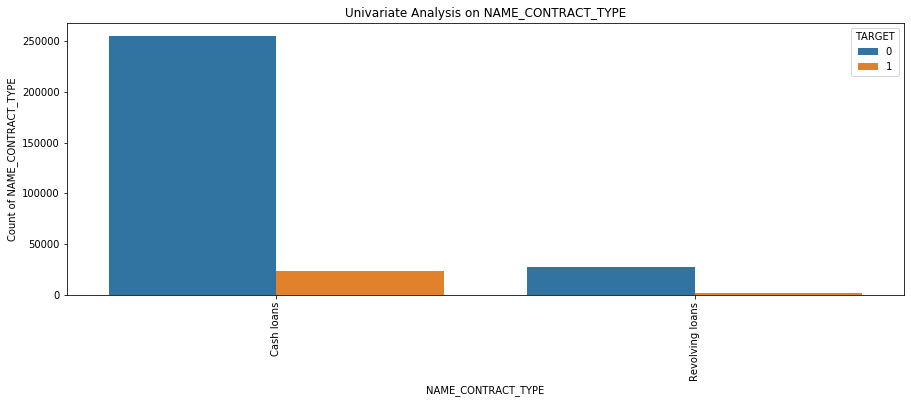

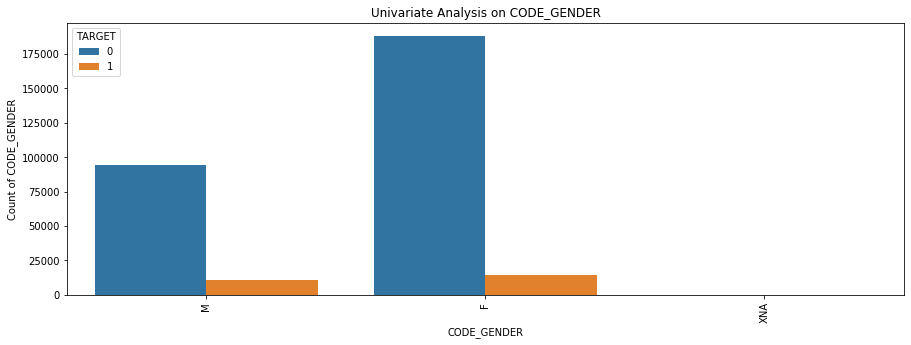

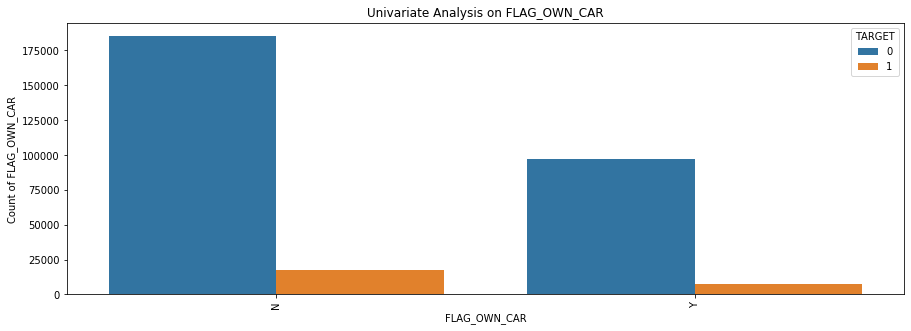

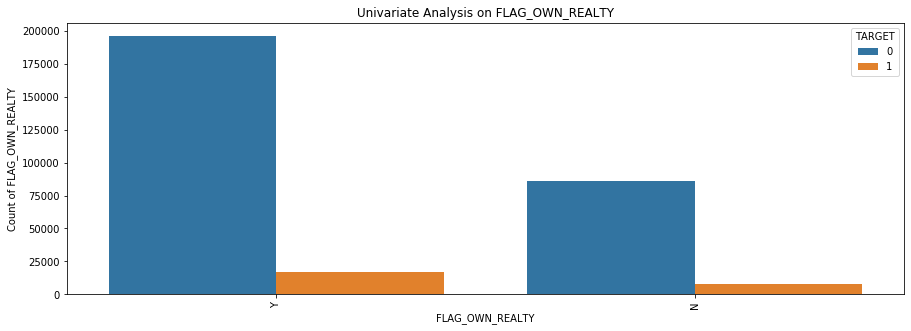

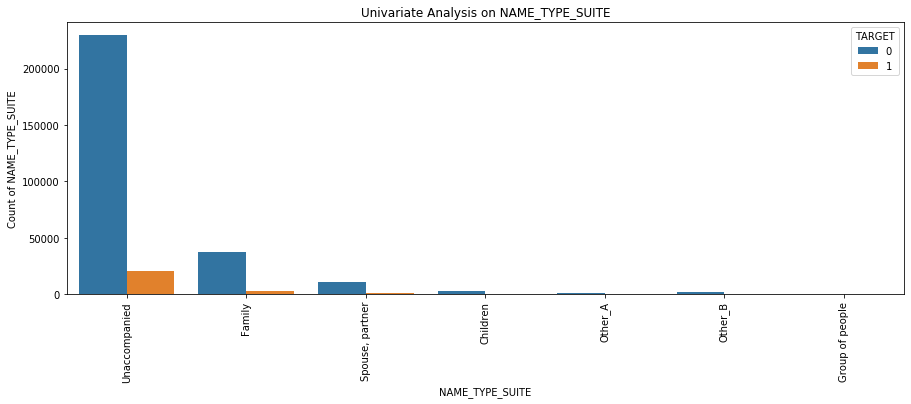

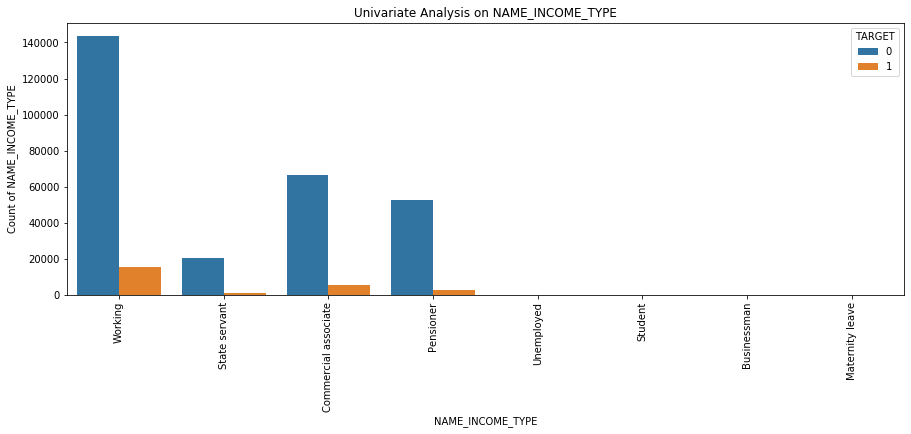

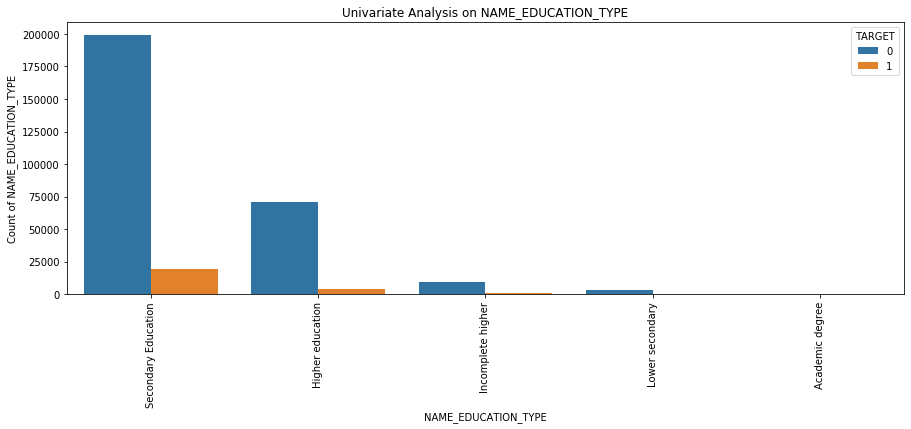

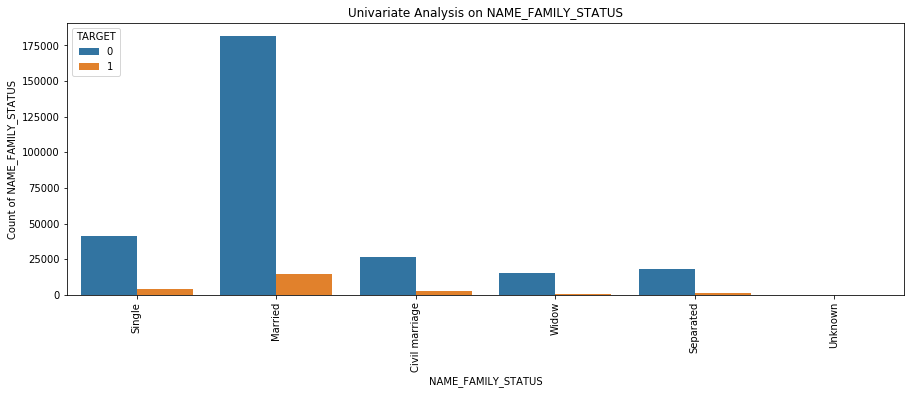

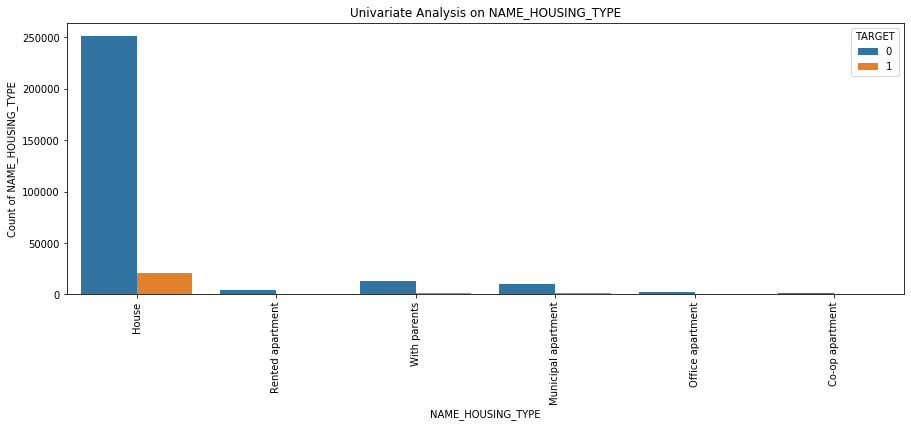

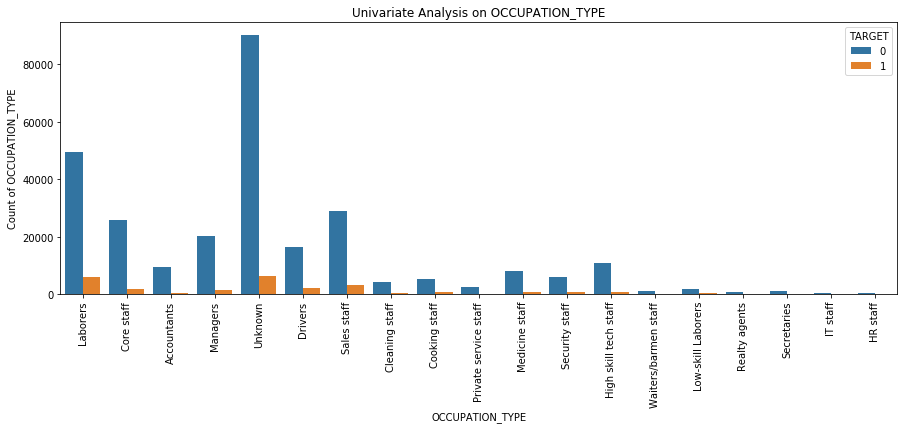

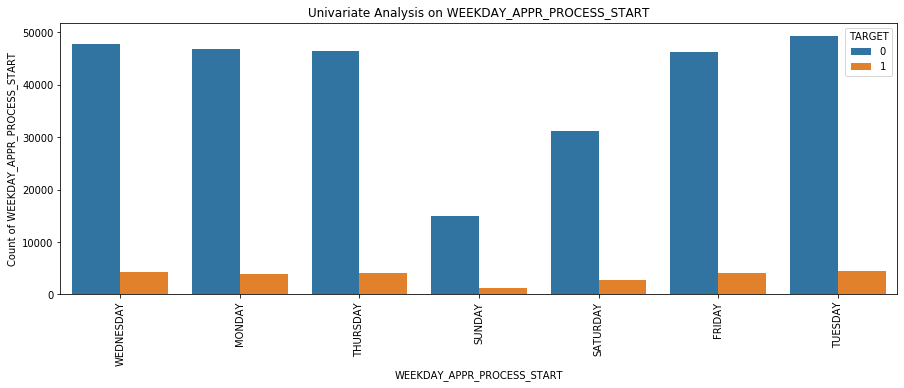

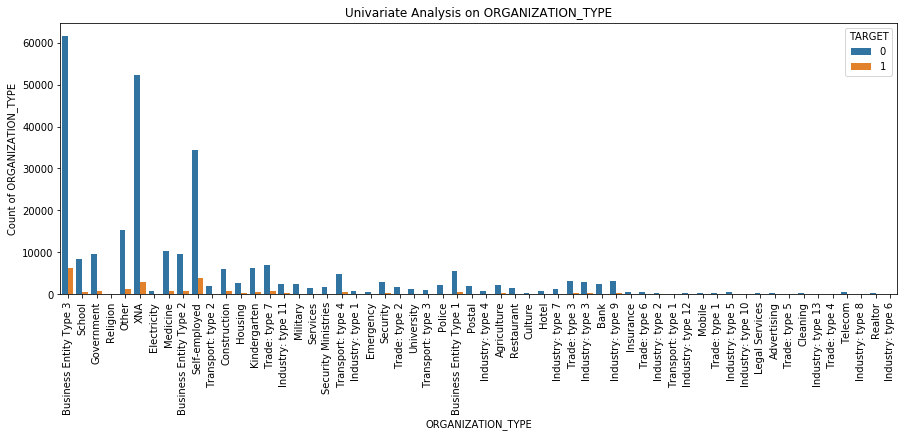

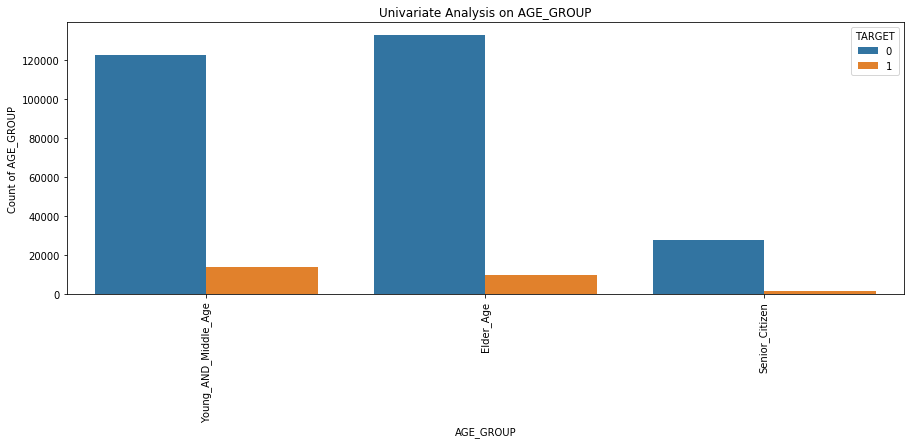

In [98]:
for fet in col_cat_full:
    fig, axs = plt.subplots(figsize = (15,5))
    sns.countplot(df[fet], hue = "TARGET", data = df)
    plt.xlabel(fet)
    plt.ylabel('Count of {}'.format(fet))
    plt.title('Univariate Analysis on {}'.format(fet))
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

In [99]:
col_num_full.pop(0)

'TARGET'

In [100]:
##### Finding the most correlated features for all numerical features
correlation_0 = df.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind="quicksort")
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]
correlation_0 = correlation_0[correlation_0 >= 0.6]
correlation_0

AGE                          FLAG_EMP_PHONE                 0.619828
FLAG_EMP_PHONE               AGE                            0.619828
YEARS_EMPLOYED               AGE                            0.623879
AGE                          YEARS_EMPLOYED                 0.623879
AMT_CREDIT                   AMT_ANNUITY                    0.770127
AMT_ANNUITY                  AMT_CREDIT                     0.770127
                             AMT_GOODS_PRICE                0.774837
AMT_GOODS_PRICE              AMT_ANNUITY                    0.774837
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.825575
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.825575
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.860556
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.860556
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860627
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860627
CNT_FAM_MEMBERS              CNT_C

#### Finding the Outliers in numerical features

In [101]:
cols_num_full1 = [
'AGE',
'AMT_ANNUITY',
'AMT_CREDIT',
'AMT_GOODS_PRICE',
'CNT_CHILDREN',
'CNT_FAM_MEMBERS',
'YEARS_EMPLOYED']

### Inferences on Numerical Features
 - Maximum AMT_ANNUITY is 258025.2
 - Maximum AMT_CREDIT is 4050000.0
 - Maximum AMT_GOODS_PRICE is 4050000.0
 - People with income_type as commercial Associate with higher income_total are more defaulters.
 - People with income_type as businessman with higher income_total are more re-payers.
 - Irrespective of Age group, clients having Education Type as Academic Degree are more likely to be re-payers.

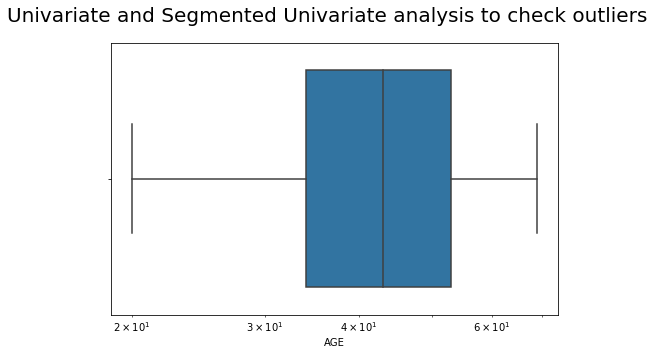

Outlier in AGE is 69


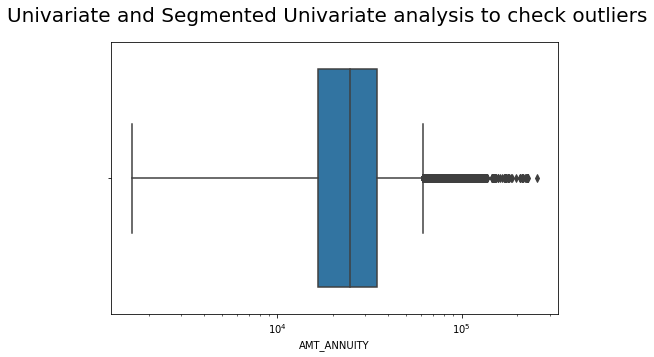

Outlier in AMT_ANNUITY is 258025.5


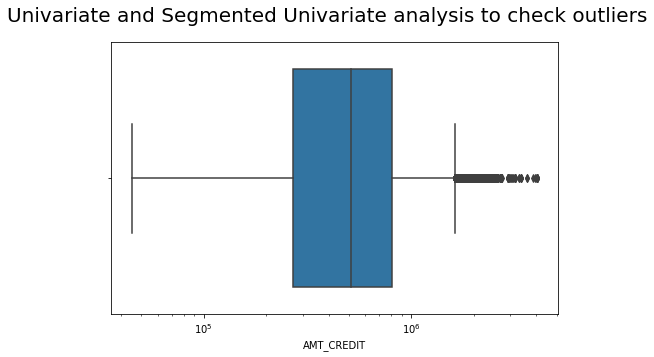

Outlier in AMT_CREDIT is 4050000.0


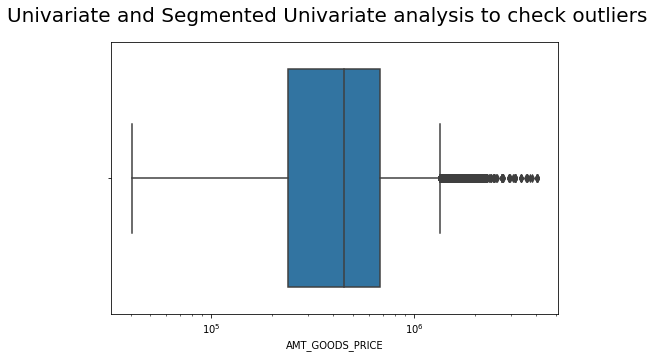

Outlier in AMT_GOODS_PRICE is 4050000.0


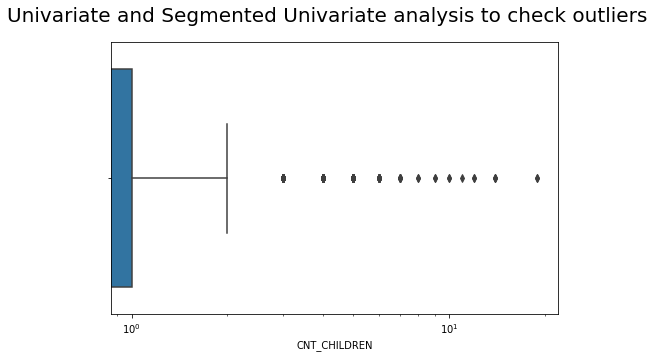

Outlier in CNT_CHILDREN is 19


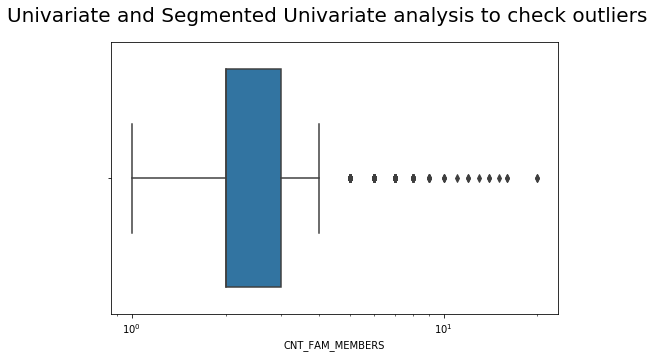

Outlier in CNT_FAM_MEMBERS is 20.0


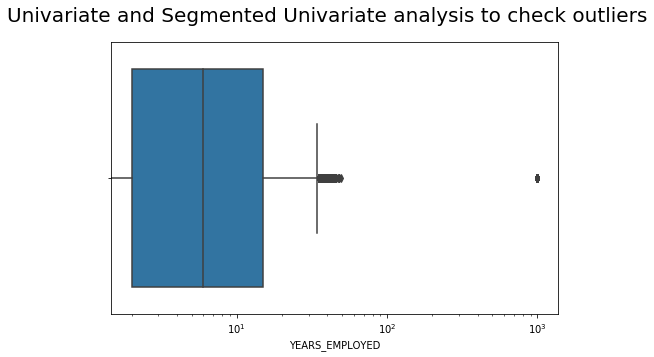

Outlier in YEARS_EMPLOYED is 1000


In [102]:
# - Observed Outliers in DF
for i in cols_num_full1:
    plt.figure(figsize=(8,5))
    plt.suptitle("Univariate and Segmented Univariate analysis to check outliers", fontsize=20)
    sns.boxplot(df[i])
    plt.xscale('log')
    plt.show()
    print('Outlier in {} is'.format(i),df[i].max())

#### Bivariate Analysis on Numerical Features

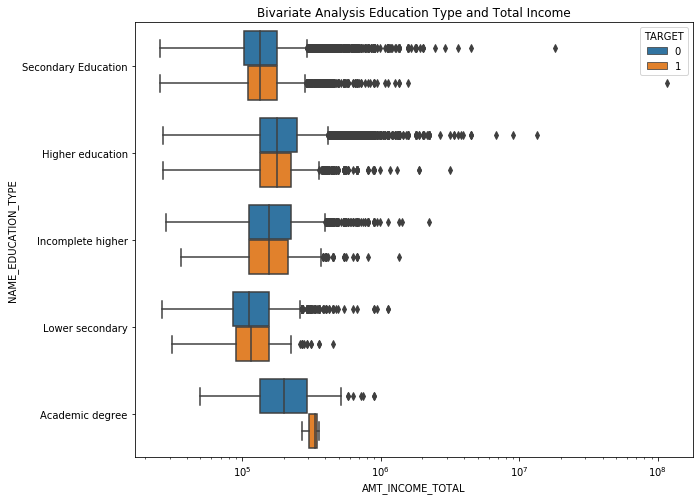

In [103]:
plt.figure(figsize=(10,8))
plt.title("Bivariate Analysis Education Type and Total Income")
sns.boxplot(y=df["NAME_EDUCATION_TYPE"],x=df["AMT_INCOME_TOTAL"],hue=df['TARGET'])
plt.xscale('log')
plt.show()

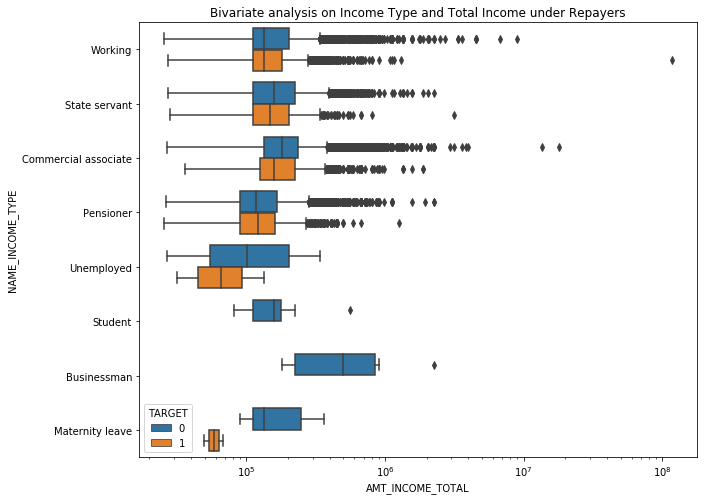

In [104]:
plt.figure(figsize=(10,8))
plt.title("Bivariate analysis on Income Type and Total Income under Repayers")
sns.boxplot(y=df["NAME_INCOME_TYPE"],x=df["AMT_INCOME_TOTAL"],hue=df['TARGET'])
plt.xscale('log')
plt.show()


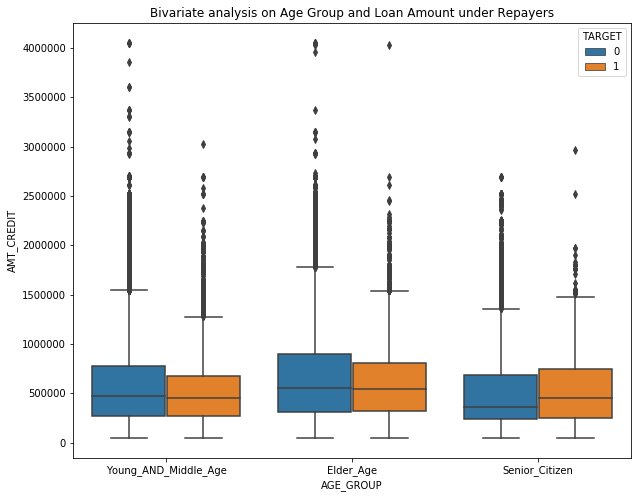

In [105]:
plt.figure(figsize=(10,8))
plt.title("Bivariate analysis on Age Group and Loan Amount under Repayers")
sns.boxplot(x=df["AGE_GROUP"],y=df["AMT_CREDIT"],hue=df["TARGET"])
plt.show()

## Final Inferences based on the EDA done on the dataset.
1. People taking Cash Loans are turning out to be defaulters compared to revolving loans.
2. Females take mroe loan compred to males and they turn out to be more defaulters compared to males.
3. Income Type as 'Working' are taking more loans and some of them are defaulters too under the same class while majority of them are repayers.
4. Occupation Type which are 'Unknown' and 'labourers' are more to be defaulted than repayers.
5. Organisation type as Business Entity Type3 are taking more loans and some of them are defaulters too under the same class while majority of them are repayers.
6. Most yound and middle aged people are defualters
7. Maximum AMT_ANNUITY is 258025.2
8. Maximum AMT_CREDIT is 4050000.0
9. Maximum AMT_GOODS_PRICE is 4050000.0
10. People with income_type as commercial Associate with higher income_total are more defaulters.
11. People with income_type as businessman with higher income_total are more re-payers.
12. Irrespective of Age group, clients having Education Type as Academic Degree are more likely to be re-payers.